In [1]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split  # Import train_test_split function
from tensorflow.keras.applications import VGG16


In [2]:

# Function to extract frames from video
def extract_frames(video_path, target_height, target_width, num_frames):
    frames = []
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_indices = np.linspace(0, total_frames - 1, num=num_frames, dtype=np.int)

    for idx in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        if ret:
            frame = cv2.resize(frame, (target_width, target_height))
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(frame)

    cap.release()
    return frames

# Function to preprocess video data
def preprocess_data(data_dir, target_height, target_width, num_frames):
    X = []
    y = []
    for video_name in os.listdir(data_dir):
        if video_name.startswith('fi'):  # Violence video
            label = 1
        elif video_name.startswith('no'):  # Non-violence video
            label = 0
        else:
            continue

        video_path = os.path.join(data_dir, video_name)
        frames = extract_frames(video_path, target_height, target_width, num_frames)
        if len(frames) == num_frames:
            X.append(frames)
            y.append(label)

    X = np.array(X)
    y = np.array(y)
    return X, y

# Define CNN-LSTM model architecture
def create_model(input_shape):
    model = models.Sequential()
    model.add(layers.TimeDistributed(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'), input_shape=input_shape))
    model.add(layers.TimeDistributed(layers.MaxPooling2D(pool_size=(2, 2))))
    model.add(layers.TimeDistributed(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')))
    model.add(layers.TimeDistributed(layers.MaxPooling2D(pool_size=(2, 2))))
    model.add(layers.TimeDistributed(layers.Flatten()))
    model.add(layers.LSTM(64))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model


In [3]:

# Parameters
data_dir = '../input/hockey-fight-vidoes/data'
target_height = 128
target_width = 128
num_frames = 16
batch_size = 32
epochs = 50

# Preprocess data
X, y = preprocess_data(data_dir, target_height, target_width, num_frames)

# Split data into train and test sets (you may need to implement this function)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
input_shape = (num_frames, target_height, target_width, 3)
model = create_model(input_shape)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/50
20/20 [==============================] - 8s 167ms/step - loss: 0.7498 - accuracy: 0.5393 - val_loss: 0.6937 - val_accuracy: 0.5063
Epoch 2/50
20/20 [==============================] - 2s 116ms/step - loss: 0.7007 - accuracy: 0.4658 - val_loss: 0.6951 - val_accuracy: 0.5125
Epoch 3/50
20/20 [==============================] - 2s 116ms/step - loss: 0.6972 - accuracy: 0.4943 - val_loss: 0.6922 - val_accuracy: 0.5125
Epoch 4/50
20/20 [==============================] - 2s 116ms/step - loss: 0.6918 - accuracy: 0.5033 - val_loss: 0.7075 - val_accuracy: 0.4938
Epoch 5/50
20/20 [==============================] - 2s 116ms/step - loss: 0.7029 - accuracy: 0.5003 - val_loss: 0.6971 - val_accuracy: 0.4938
Epoch 6/50
20/20 [==============================] - 2s 116ms/step - loss: 0.6981 - accuracy: 0.4880 - val_loss: 0.6938 - val_accuracy: 0.4938
Epoch 7/50
20/20 [==============================] - 2s 118ms/step - loss: 0.6926 - accuracy: 0.5178 - val_loss: 0.6936 - val_accuracy: 0.4938
Epoch 

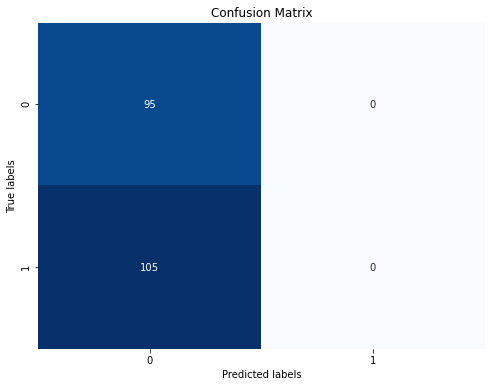

In [4]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train the model
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_classes)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_mat)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Save the model
model.save('violence_detection_model.h5')


In [5]:
# Train the model
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)



Epoch 1/50
20/20 [==============================] - 2s 123ms/step - loss: 0.6929 - accuracy: 0.5109 - val_loss: 0.6937 - val_accuracy: 0.4938
Epoch 2/50
20/20 [==============================] - 2s 116ms/step - loss: 0.6929 - accuracy: 0.5109 - val_loss: 0.6936 - val_accuracy: 0.4938
Epoch 3/50
20/20 [==============================] - 2s 116ms/step - loss: 0.6930 - accuracy: 0.5109 - val_loss: 0.6934 - val_accuracy: 0.4938
Epoch 4/50
20/20 [==============================] - 2s 116ms/step - loss: 0.6935 - accuracy: 0.5109 - val_loss: 0.6935 - val_accuracy: 0.4938
Epoch 5/50
20/20 [==============================] - 2s 116ms/step - loss: 0.6934 - accuracy: 0.4797 - val_loss: 0.6936 - val_accuracy: 0.4938
Epoch 6/50
20/20 [==============================] - 2s 116ms/step - loss: 0.6930 - accuracy: 0.5109 - val_loss: 0.6938 - val_accuracy: 0.4938
Epoch 7/50
20/20 [==============================] - 2s 116ms/step - loss: 0.6935 - accuracy: 0.4734 - val_loss: 0.6933 - val_accuracy: 0.4938
Epoch 

In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

# Save the mode
model.save('violence_detection_model.h5')

7/7 [==============================] - 0s 34ms/step - loss: 0.6946 - accuracy: 0.4750
Test Accuracy: 0.4749999940395355


In [7]:
#function to get video frame
def get_frames(current_dir, file_name):
    
    in_file = os.path.join(current_dir, file_name)
    
    images = []
    
    vidcap = cv2.VideoCapture(in_file)
    
    success,image = vidcap.read()
        
    count = 0

    while count<_images_per_file:
                
        RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
        res = cv2.resize(RGB_img, dsize=(img_size, img_size),
                                 interpolation=cv2.INTER_CUBIC)
    
        images.append(res)
    
        success,image = vidcap.read()
    
        count += 1
        
    resul = np.array(images)
    
    resul = (resul / 255.).astype(np.float16)
        
    return result

In [8]:
#function to label data
def label_video_names(in_dir):
    
    # list containing video names
    names = []
    # list containin video labels [1, 0] if it has violence and [0, 1] if not
    labels = []
    
    
    for current_dir, dir_names,file_names in os.walk(in_dir):
        
        for file_name in file_names:
            
            if file_name[0:2] == 'fi':
                labels.append([1,0])
                names.append(file_name)
            elif file_name[0:2] == 'no':
                labels.append([0,1])
                names.append(file_name)
                     
            
    c = list(zip(names,labels))
    # Suffle the data (names and labels)
    shuffle(c)
    
    names, labels = zip(*c)
            
    return names, labels